# Figure 2

In [1]:
import stylia
import numpy as np
import matplotlib.pyplot as plt
from stylia import TWO_COLUMNS_WIDTH, ONE_COLUMN_WIDTH
import pandas as pd

## Search aggregates

In [2]:
df = pd.read_csv("../results/cheese_search_aggregate.csv")

In [3]:
df

,database,category,search_type,counts,mean,std,median,perc_25,perc_75,min,max
0,zinc15,natural,consensus,54015,0.461934,0.166149,0.434783,0.333333,0.566667,0.157534,1.000000
1,zinc15,natural,morgan,53028,0.446320,0.173076,0.411765,0.314607,0.558140,0.146552,1.000000
2,zinc15,natural,espsim_shape,54153,0.388544,0.173589,0.350000,0.255814,0.478261,0.111111,1.000000
3,zinc15,natural,espsim_electrostatic,52222,0.405286,0.177326,0.371429,0.265957,0.507937,0.120000,1.000000
4,zinc15,synthetic,consensus,47943,0.456893,0.136613,0.444444,0.358491,0.540541,0.142857,1.000000
5,zinc15,synthetic,morgan,46470,0.439527,0.142295,0.425000,0.333333,0.526316,0.090909,1.000000
6,zinc15,synthetic,espsim_shape,47234,0.372073,0.142800,0.344828,0.270270,0.446429,0.119318,1.000000
7,zinc15,synthetic,espsim_electrostatic,46270,0.381666,0.149991,0.358974,0.270270,0.462500,0.097222,1.000000
8,zinc15,both,consensus,1214,0.509433,0.171325,0.457449,0.371520,0.649351,0.237037,1.000000
9,zinc15,both,morgan,1125,0.517795,0.171660,0.472727,0.370370,0.657534,0.219697,1.000000


In [4]:
def sum_counts(df):
    s = np.sum(df["counts"])
    return s


def analyze_counts(df):
    df_syn = df[df["category"] == "synthetic"]
    df_nat = df[df["category"] == "natural"]
    df_znc_syn = df_syn[df_syn["database"] == "zinc15"]
    df_znc_nat = df_nat[df_nat["database"] == "zinc15"]
    znc_in_syn = sum_counts(df_znc_syn) / sum_counts(df_syn)
    znc_in_nat = sum_counts(df_znc_nat) / sum_counts(df_syn)
    print(f"ZINC15 in synthetic: {znc_in_syn}")
    print(f"ZINC15 in natural: {znc_in_nat}")


analyze_counts(df)
analyze_counts(df[df["search_type"] == "espsim_electrostatic"])

ZINC15 in synthetic: 0.76889116202946
ZINC15 in natural: 0.8732324058919804
ZINC15 in synthetic: 0.7572831423895253
ZINC15 in natural: 0.8546972176759411


        database category           search_type  counts      mean       std  \
12  enamine-real  natural             consensus    6885  0.390575  0.146678   
13  enamine-real  natural                morgan    7872  0.351653  0.137925   
14  enamine-real  natural          espsim_shape    6747  0.288873  0.117230   
15  enamine-real  natural  espsim_electrostatic    8678  0.316833  0.137483   

      median   perc_25   perc_75       min  max  
12  0.352941  0.274194  0.482143  0.158333  1.0  
13  0.314815  0.250000  0.421053  0.152000  1.0  
14  0.250000  0.205479  0.348837  0.110092  1.0  
15  0.271429  0.205882  0.406780  0.120000  1.0  


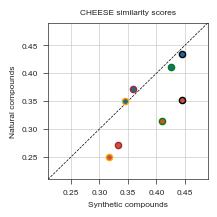

In [5]:
df_syn = df[df["category"] == "synthetic"]
df_nat = df[df["category"] == "natural"]

fig, axs = stylia.create_figure(
    1, 1, width=TWO_COLUMNS_WIDTH * 0.3, height=TWO_COLUMNS_WIDTH * 0.3
)

ax = axs.next()

statistic = "median"

df_syn = df[df["category"] == "synthetic"]
df_nat = df[df["category"] == "natural"]
df_znc_syn = df_syn[df_syn["database"] == "zinc15"]
df_znc_nat = df_nat[df_nat["database"] == "zinc15"]
df_ena_syn = df_syn[df_syn["database"] == "enamine-real"]
df_ena_nat = df_nat[df_nat["database"] == "enamine-real"]

from stylia.colors.colors import NamedColors

named_colors = NamedColors()

database_colors = {"zinc15": named_colors.blue, "enamine-real": named_colors.red}
search_type_colors = {
    "consensus": "black",
    "morgan": "green",
    "espsim_shape": "orange",
    "espsim_electrostatic": "brown",
}

ax.plot([0, 1], [0, 1], color="black", linestyle="--")

categories = ["synthetic", "natural"]
databases = ["zinc15", "enamine-real"]
search_types = ["consensus", "morgan", "espsim_shape", "espsim_electrostatic"]
for s in search_types:
    for d in databases:
        db = df[df["database"] == d]
        db = db[db["search_type"] == s]
        dx = db[db["category"] == categories[0]]
        dy = db[db["category"] == categories[1]]
        ax.scatter(
            dx[statistic],
            dy[statistic],
            color=database_colors[d],
            edgecolors=search_type_colors[s],
            zorder=1000,
            s=20,
        )
        # ax.plot([dx["median"], dx["median"]], [dy["perc_25"], dy["perc_75"]], color=search_type_colors[s])
        # ax.plot([dx["perc_25"], dx["perc_75"]], [dy["median"], dy["median"]], color=search_type_colors[s])

edgecolors = ["black", "green", "orange", "brown"]
print(df_ena_nat)

ax.set_xlim(0.21, 0.49)
ax.set_ylim(0.21, 0.49)
stylia.label(
    ax,
    title="CHEESE similarity scores",
    xlabel="Synthetic compounds",
    ylabel="Natural compounds",
)
stylia.save_figure("../figures/f2_a.png")

In [6]:
df = pd.read_csv("../results/cheese_popular_hits.csv")

df[df["database"] == "enamine-real"]

,smiles,inchikey,consensus_hits,consensus_syn_hits,consensus_nat_hits,consensus_score,consensus_syn_score,consensus_nat_score,database
355,COC1=CC(/C=C/C2=CC=C(O)C(OC)=C2)=CC=C1O,KQPXJFAYGYIGRU-ONEGZZNKSA-N,18,0,18,11.334831,0.000000,11.334831,enamine-real
356,COc1cc(/C=C/c2ccc(O)c(OC)c2)ccc1O,KQPXJFAYGYIGRU-ONEGZZNKSA-N,18,0,18,11.334831,0.000000,11.334831,enamine-real
414,Cc1cncc(C(=O)Oc2ccc(Cl)cc2)c1,YZSUXLLRXCIBPH-UHFFFAOYSA-N,17,17,0,7.100476,7.100476,0.000000,enamine-real
415,CC1=CN=CC(C(=O)OC2=CC=C(Cl)C=C2)=C1,YZSUXLLRXCIBPH-UHFFFAOYSA-N,17,17,0,7.100476,7.100476,0.000000,enamine-real
446,COC1=CC(NC(=O)/C=C/C2=CC=C(O)C(O)=C2)=CC=C1O,VLAIUMJTYQEOIV-XVNBXDOJSA-N,16,0,16,9.433561,0.000000,9.433561,enamine-real
...,...,...,...,...,...,...,...,...,...
84935,CC1=CNC(CC(N)=O)=C1C(=O)N1C[C@@H](CO)[C@H](C2=...,ISGYSFRBPWCXHC-GJZGRUSLSA-N,1,1,0,0.143791,0.143791,0.000000,enamine-real
84936,CC1=NC2=CC(C)=NN2C(C(=O)NCC2(C)CC(F)(F)CN2C(=O...,SSUAISVWFHICPR-UHFFFAOYSA-N,1,1,0,0.143791,0.143791,0.000000,enamine-real
84937,C#CCCC(=O)NCC1(C)CC(F)(F)CN1C(=O)C1=NN(C(C)C)C=N1,GHWZDSKKWHEZKT-UHFFFAOYSA-N,1,1,0,0.143791,0.143791,0.000000,enamine-real
84938,CC1=CNC(CC(N)=O)=C1C(=O)N[C@@H]1C[C@@H](C)CN(C...,STVHRCUPYVIGJH-TZMCWYRMSA-N,1,1,0,0.143791,0.143791,0.000000,enamine-real


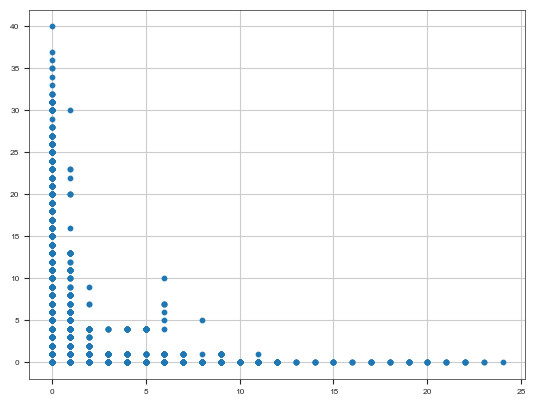

In [7]:
plt.scatter(df["consensus_syn_hits"], df["consensus_nat_hits"])

## Cumulative plot by similarity

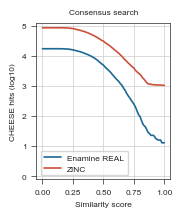

In [33]:
import stylia


def cumulative_points(values):
    x = np.arange(0, 1.01, 0.01)
    y = []
    for x_ in x:
        y += [np.sum(values >= x_)]
    return np.array(y)


df = pd.read_csv("../results/cheese_popular_hits.csv")
cumulative_points(df["consensus_max_score"])

x = np.arange(0, 1.01, 0.01)
ye = cumulative_points(df[df["database"] == "enamine-real"]["consensus_max_score"])
yz = cumulative_points(df[df["database"] == "zinc15"]["consensus_max_score"])

fig, axs = stylia.create_figure(
    1, 1, width=TWO_COLUMNS_WIDTH * 0.25, height=TWO_COLUMNS_WIDTH * 0.3
)
ax = axs.next()
ax.plot(x, np.log10(ye), label="Enamine REAL", color=named_colors.blue, lw=1.2)
ax.plot(x, np.log10(ye + yz), label="ZINC", color=named_colors.red, lw=1.2)
ax.set_xlim(-0.05, 1.05)
ax.set_ylim(-0.1, 5.1)
stylia.label(
    ax,
    title="Consensus search",
    xlabel="Similarity score",
    ylabel="CHEESE hits (log10)",
)
ax.legend()
stylia.save_figure("../figures/f2_b.png")